In [1]:
%matplotlib widget
import obspy
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, aic_simple
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import coincidence_trigger
from obspy.signal.cross_correlation import correlation_detector
from obspy.signal import PPSD
from obspy import read_inventory
from obspy.realtime.signal import kurtosis




from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import obspy.signal.trigger as trigger
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plot_working
import event_processing
import loading_stream_function

import matplotlib.ticker as ticker
from datetime import datetime
from datetime import timedelta

In [2]:
class PrecisionDateFormatter(ticker.Formatter):
    """
    Extend the `matplotlib.ticker.Formatter` class to allow for millisecond
    precision when formatting a tick (in days since the epoch) with a
    `~datetime.datetime.strftime` format string.

    """

    def __init__(self, fmt, precision=3, tz=None):
        """
        Parameters
        ----------
        fmt : str
            `~datetime.datetime.strftime` format string.
        """
        from matplotlib.dates import num2date
        if tz is None:
            from matplotlib.dates import _get_rc_timezone
            tz = _get_rc_timezone()
        self.num2date = num2date
        self.fmt = fmt
        self.tz = tz
        self.precision = precision

    def __call__(self, x, pos=0):
        if x == 0:
            raise ValueError("DateFormatter found a value of x=0, which is "
                             "an illegal date; this usually occurs because "
                             "you have not informed the axis that it is "
                             "plotting dates, e.g., with ax.xaxis_date()")

        dt = self.num2date(x, self.tz)
        ms = dt.strftime("%f")[:self.precision]

        return dt.strftime(self.fmt).format(ms=ms)

    def set_tzinfo(self, tz):
        self.tz = tz


In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
chan = 'GHZ'
#statlist = [ 'A01' ,'A03' , 'A05' , 'A07' , 'A09' , 'A11' , 'A13' , 'A15' , 'A17' , 'A19' ]
statlist = [ 'A01' ,'A02' , 'A03' , 'A04' , 'A05' , 'A06' , 'A07' , 'A08' , 'A09', 'A10' , 'A11', 'A13', 'A14', 'A19']#, 'A16', 'A17', 'A18', 'A19' ]
#statlist = [ 'B01' ,'B02' , 'B03' , 'B04' , 'B06' , 'B07' , 'B08' , 'B09','B10' , 'B11', 'B12', 'B13' , 'B19' , 'B20']#,'B14','B15','B16','B17','B18','B19', 'B20' ]

day = 15
hr = 15
start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+hr*3600
end_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+(hr+1)*3600
stream = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan +".2020.0" +str(day))


In [5]:
for s in statlist[1:]:
    
    stream += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan + ".2020.0" + str(day))


In [6]:
data = stream.slice(starttime=start_time,endtime=end_time) #look into trim()
#print(data)

In [ ]:
data = data.detrend("linear")

In [7]:
data = data.detrend("demean")

In [9]:
data1 = data.copy()

In [11]:
events = coincidence_trigger("classicstalta", 5, 0.8, data1, 3, sta=0.02, lta=0.2)




#events = coincidence_trigger("classicstalta", 4, 0.5, stream_2, 3, sta=0.08, lta=0.5)
events = pd.DataFrame(events)

In [12]:
events

,time,stations,trace_ids,coincidence_sum,similarity,duration
0,2020-01-15T15:00:02.857000Z,"[A04, A03, A06, A01, A02, A05]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A06..BHZ, 7F.A01...",6.0,{},0.131
1,2020-01-15T15:00:03.378000Z,"[A04, A03, A02, A06]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A02..BHZ, 7F.A06...",4.0,{},0.106
2,2020-01-15T15:00:39.894000Z,"[A04, A03, A06, A02, A05, A01]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A06..BHZ, 7F.A02...",6.0,{},0.131
3,2020-01-15T15:00:41.142000Z,"[A04, A03, A06, A02, A01]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A06..BHZ, 7F.A02...",5.0,{},0.108
4,2020-01-15T15:00:43.219000Z,"[A04, A03, A06, A05, A02, A01]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A06..BHZ, 7F.A05...",6.0,{},0.136
...,...,...,...,...,...,...
1496,2020-01-15T15:59:53.218000Z,"[A04, A03, A06, A01, A02, A05, A09]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A06..BHZ, 7F.A01...",7.0,{},0.167
1497,2020-01-15T15:59:53.714000Z,"[A04, A03, A06, A01, A02, A05]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A06..BHZ, 7F.A01...",6.0,{},0.102
1498,2020-01-15T15:59:56.054000Z,"[A04, A06, A03, A01, A02, A05]","[7F.A04..BHZ, 7F.A06..BHZ, 7F.A03..BHZ, 7F.A01...",6.0,{},0.131
1499,2020-01-15T15:59:56.492000Z,"[A04, A03, A06, A05, A02, A01, A10]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A06..BHZ, 7F.A05...",7.0,{},0.184


In [37]:
event_id = 456
event_meta = events.iloc[event_id]

In [38]:
event_meta

time                                     2020-01-15T15:21:47.385000Z
stations                    [A04, A06, A03, A02, A05, A01, A09, A10]
trace_ids          [7F.A04..BHZ, 7F.A06..BHZ, 7F.A03..BHZ, 7F.A02...
coincidence_sum                                                  8.0
similarity                                                        {}
duration                                                       0.204
Name: 456, dtype: object

In [39]:
gw_test = event_processing.get_waveforms(data, event_meta.time)

In [40]:
g_wind = event_processing.get_event_window_raw(data,event_meta.time)

In [45]:
g_wind

14 Trace(s) in Stream:
7F.A01..BHZ | 2020-01-15T15:21:47.185000Z - 2020-01-15T15:21:47.885000Z | 1000.0 Hz, 701 samples
7F.A02..BHZ | 2020-01-15T15:21:47.185000Z - 2020-01-15T15:21:47.885000Z | 1000.0 Hz, 701 samples
7F.A03..BHZ | 2020-01-15T15:21:47.185000Z - 2020-01-15T15:21:47.885000Z | 1000.0 Hz, 701 samples
7F.A04..BHZ | 2020-01-15T15:21:47.185000Z - 2020-01-15T15:21:47.885000Z | 1000.0 Hz, 701 samples
7F.A05..BHZ | 2020-01-15T15:21:47.185000Z - 2020-01-15T15:21:47.885000Z | 1000.0 Hz, 701 samples
7F.A06..BHZ | 2020-01-15T15:21:47.185000Z - 2020-01-15T15:21:47.885000Z | 1000.0 Hz, 701 samples
7F.A07..BHZ | 2020-01-15T15:21:47.185000Z - 2020-01-15T15:21:47.885000Z | 1000.0 Hz, 701 samples
7F.A08..BHZ | 2020-01-15T15:21:47.185000Z - 2020-01-15T15:21:47.885000Z | 1000.0 Hz, 701 samples
7F.A09..BHZ | 2020-01-15T15:21:47.185000Z - 2020-01-15T15:21:47.885000Z | 1000.0 Hz, 701 samples
7F.A10..BHZ | 2020-01-15T15:21:47.185000Z - 2020-01-15T15:21:47.885000Z | 1000.0 Hz, 701 samples
7F.A11.

In [42]:
import numpy as np
from copy import copy, deepcopy
from obspy.core import Trace


def do_fft(signal, delta):
    """Compute the complex Fourier transform of a signal."""
    npts = len(signal)
    # if npts is even, we make it odd
    # so that we do not have a negative frequency in the last point
    # (see numpy.fft.rfft doc)
    if not npts % 2:
        npts -= 1

    fft = np.fft.rfft(signal, n=npts) * delta
    fftfreq = np.fft.fftfreq(len(signal), d=delta)
    fftfreq = fftfreq[0:fft.size]
    return fft, fftfreq



def do_spectrum(trace):
    """Compute the spectrum of an ObsPy Trace object."""
    signal = trace.data
    delta = trace.stats.delta
    amp, freq = do_fft(signal, delta)
    return amp, freq

In [46]:
amp, freq = do_spectrum(g_wind[4])

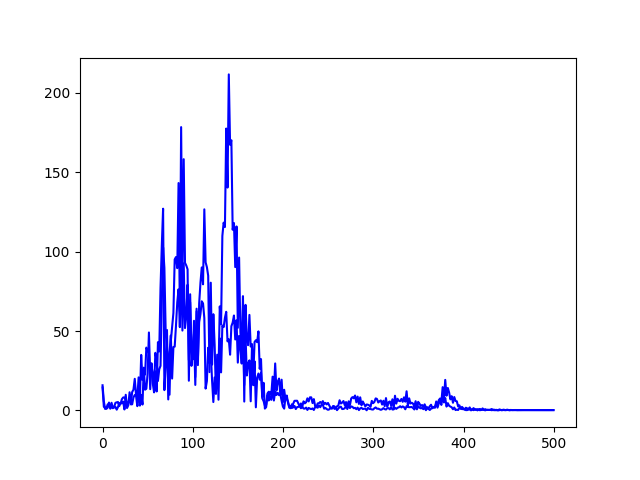

In [47]:
plt.plot(freq, abs(amp), 'blue')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
plt.show()

In [ ]:
stream_bp1 = data.copy()

In [ ]:
stream_bp1 = stream_bp1.filter('bandpass', freqmin=60, freqmax=240, corners=1, zerophase=True)

In [ ]:
fig, ax = plt.subplots(1, figsize=(17, 15), sharex=True, sharey=False)
ax.plot(data[0].times('matplotlib'), data[0].data, color='black')
ax.plot(data[0].times('matplotlib'), stream_bp1[0].data, color='darkred')
ax.xaxis.set_major_formatter(PrecisionDateFormatter("%H:%M:%S.{ms}"))

In [ ]:
data[0].times()

In [ ]:
data[0].data